In [20]:
import pandas as pd
from clustertesters import lr_KMeansTestCluster as kmtc
from clustertesters import ExpectationMaximizationTestCluster as emtc


/Users/weihuafeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/weihuafeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


-45.656263287628015
-44.07742564770053
4383
8432
7185
-43.41003379949823
-42.85637142299772
-42.55631714290793
-40.99557436168677
-39.10255370457701
-39.678914397603656
-38.767340776175615
-39.755826062381324
-38.0371512703566
-38.23394656161295
-38.607264477811974
-37.73682312981509
-38.63116274739077
-36.97241325830658
-37.47938174426148
-37.332801678717416
-36.61443587472285
-37.25727880614542
-36.5244699190453
-36.441123609012564
-36.04434085903771
-35.703538954922045
-36.14870738614276
-36.00714705011793
-35.74737927893804
-33.578038921714075


/Users/weihuafeng/anaconda3/lib/python3.7/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


-33.659206194024705
-36.16579619284729


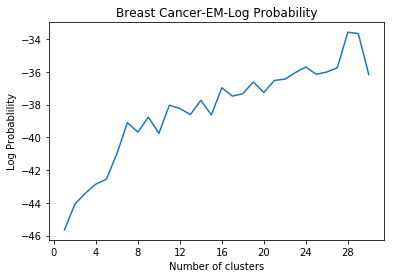

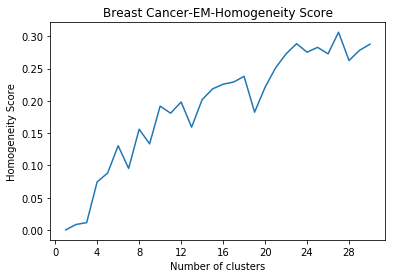

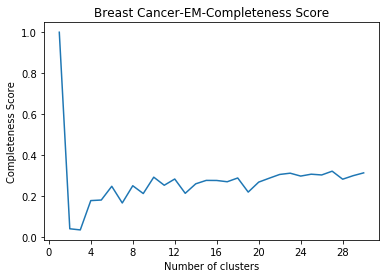

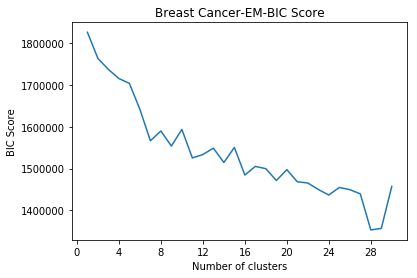

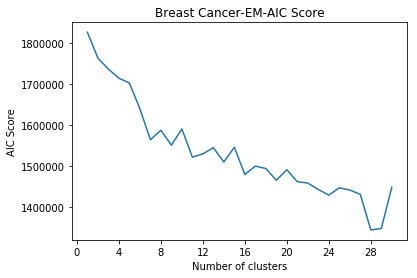

In [21]:
def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod[target_column].replace(map_to_int, inplace=True)
    return (df_mod, map_to_int)

if __name__ == "__main__":
    letter_recognition = pd.read_csv("letter.csv")
    
    dft, mapping = encode_target(letter_recognition, "class")
    X = (dft.ix[:, :-1])
    y = dft.ix[:, -1]

    tester = emtc.ExpectationMaximizationTestCluster(X, y, clusters=range(1,31), plot=True, targetcluster=3, stats=True)
    tester.run()
